IMPORT LIBRARY YANG DIBUTUHKAN

In [81]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Model ML
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

LOAD DATASET

In [82]:
# Membaca dataset CSV ke dalam DataFrame.
df = pd.read_csv("/content/LasVegasTripAdvisorReviews-Dataset.csv", sep=';')

df.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [83]:
# Lihat Struktur Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    object
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [84]:
# Memberi statistik dasar (mean, min, max, dll).
df.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


VALIDASI EDA (OPSIONAL)

(504, 20)
User country         object
Nr. reviews           int64
Nr. hotel reviews     int64
Helpful votes         int64
Score                 int64
Period of stay       object
Traveler type        object
Pool                 object
Gym                  object
Tennis court         object
Spa                  object
Casino               object
Free internet        object
Hotel name           object
Hotel stars          object
Nr. rooms             int64
User continent       object
Member years          int64
Review month         object
Review weekday       object
dtype: object
['User country', 'Nr. reviews', 'Nr. hotel reviews', 'Helpful votes', 'Score', 'Period of stay', 'Traveler type', 'Pool', 'Gym', 'Tennis court', 'Spa', 'Casino', 'Free internet', 'Hotel name', 'Hotel stars', 'Nr. rooms', 'User continent', 'Member years', 'Review month', 'Review weekday']


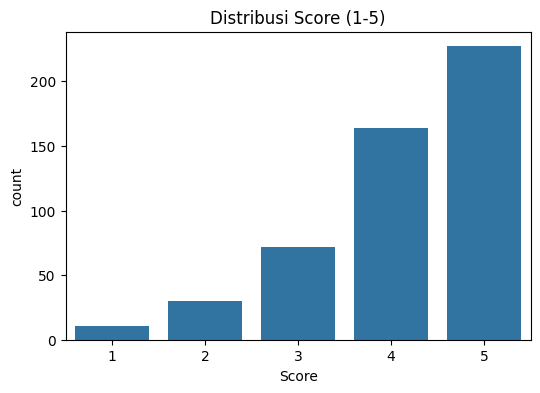

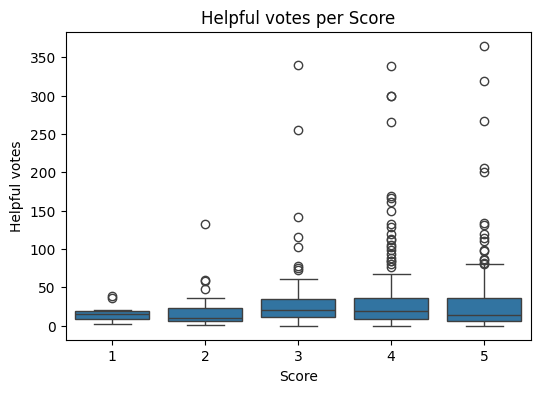

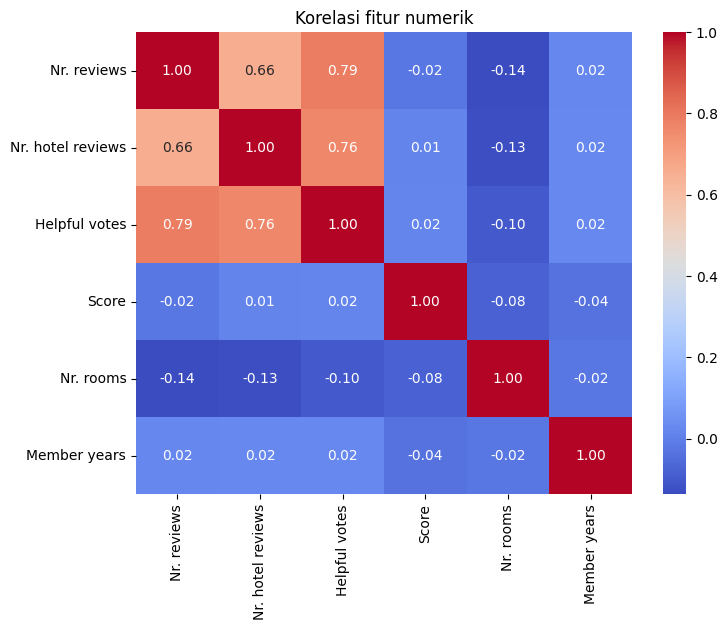

In [85]:
# 1) Kolom & tipe data
print(df.shape)
print(df.dtypes)
print(df.columns.tolist())

# 2) Distribusi Score (label)
plt.figure(figsize=(6,4))
sns.countplot(x='Score', data=df)
plt.title('Distribusi Score (1-5)')
plt.show()

# 3) Boxplot: Helpful votes per Score
plt.figure(figsize=(6,4))
sns.boxplot(x='Score', y='Helpful votes', data=df)
plt.title('Helpful votes per Score')
plt.show()

# 4) Heatmap korelasi fitur numerik
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasi fitur numerik')
plt.show()

DATA PREPARATION

In [86]:
# TENTUKAN FITUR (X) DAN TARGET (y)
# Target yang kita prediksi: Rating
# Fitur (input)
X = df.drop(columns=['Score'])

# Target (output)
y = df['Score']

In [87]:
# ENCODING LABEL
# Kolom kategorikal
##cat_cols = X.select_dtypes(include=['object']).columns

# Kolom numerik
## num_cols = X.select_dtypes(exclude=['object']).columns

# TIDAK DIPERLUKAN ENCODING LABEL

In [88]:
# ONE-HOT ENCODING KOLOM KATEGORIKAL

# X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [89]:
# Ambil hanya kolom numerik
X = X.select_dtypes(include=['int64', 'float64'])

In [90]:
# Membagi dataset menjadi data latih (training) dan data uji (testing)
# X  : fitur (variabel input)
# y  : target/label yang akan diprediksi
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [91]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODELING

In [92]:
#@title BASELINE (LOGISTIC REGRESSION)

model_baseline = LogisticRegression(
    max_iter=1000,
    solver='lbfgs'
)

model_baseline.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [93]:
# Evaluasi Baseline Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_baseline = model_baseline.predict(X_test_scaled)

print("=== Logistic Regression ===")
print("Accuracy :", accuracy_score(y_test, y_pred_baseline))
print(classification_report(y_test, y_pred_baseline))

=== Logistic Regression ===
Accuracy : 0.46534653465346537
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        14
           4       0.50      0.09      0.15        33
           5       0.46      0.96      0.62        46

    accuracy                           0.47       101
   macro avg       0.19      0.21      0.16       101
weighted avg       0.37      0.47      0.33       101



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


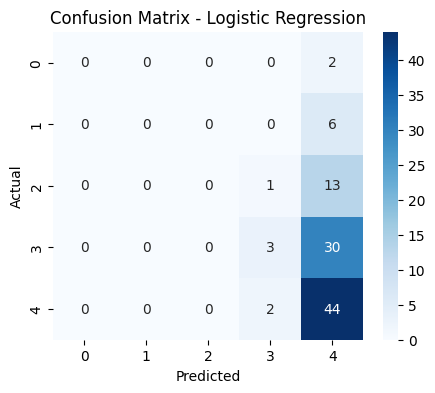

In [94]:
# Confusion Matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)

plt.figure(figsize=(5,4))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [95]:
#@title ADVANCED ML (RANDOM FOREST)

model_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [96]:
# Evaluasi Random Forest
y_pred_rf = model_rf.predict(X_test)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
Accuracy: 0.43564356435643564
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           3       1.00      0.07      0.13        14
           4       0.32      0.21      0.25        33
           5       0.47      0.78      0.59        46

    accuracy                           0.44       101
   macro avg       0.36      0.21      0.19       101
weighted avg       0.46      0.44      0.37       101



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


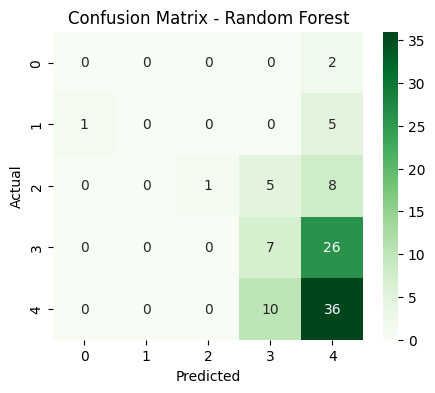

In [97]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

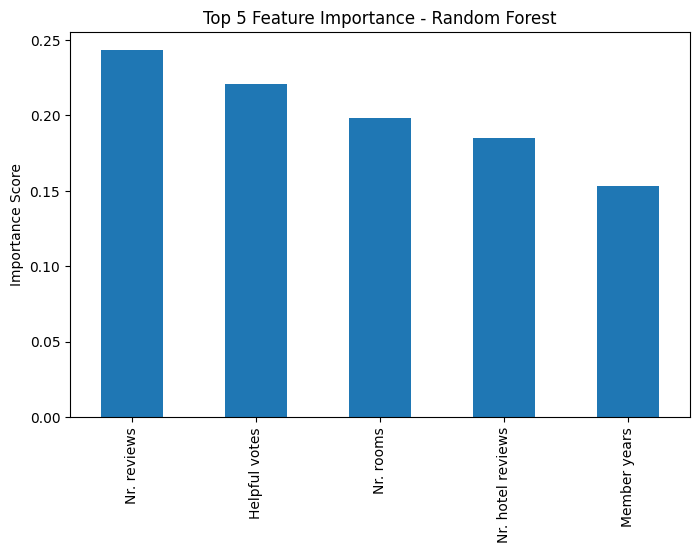

In [98]:
# Feature Importance (WAJIB UNTUK RF)
importances = model_rf.feature_importances_
features = X_train.columns

fi = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
fi.head(10).plot(kind='bar')
plt.title("Top 5 Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.show()

In [99]:
#@title DEEP LEARNING (MLP)

#Import TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [100]:
# Bangun Arsitektur MLP
model_dl = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [101]:
# Compile Model
model_dl.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [102]:
# Training Model DL
history = model_dl.fit(
    X_train_scaled,
    y_train - 1, # Adjust labels to be 0-indexed
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.2612 - loss: 1.5922 - val_accuracy: 0.3951 - val_loss: 1.4800
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4550 - loss: 1.4732 - val_accuracy: 0.4198 - val_loss: 1.3866
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5093 - loss: 1.3696 - val_accuracy: 0.4568 - val_loss: 1.3229
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4736 - loss: 1.3114 - val_accuracy: 0.4568 - val_loss: 1.2840
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4785 - loss: 1.3125 - val_accuracy: 0.4568 - val_loss: 1.2690
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5049 - loss: 1.2658 - val_accuracy: 0.4568 - val_loss: 1.2587
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5135 - loss: 1.2801 - val_accuracy: 0.4568 - val_loss: 1.2554
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4580 - loss: 1.2503 - val_accuracy: 0.4568 - v

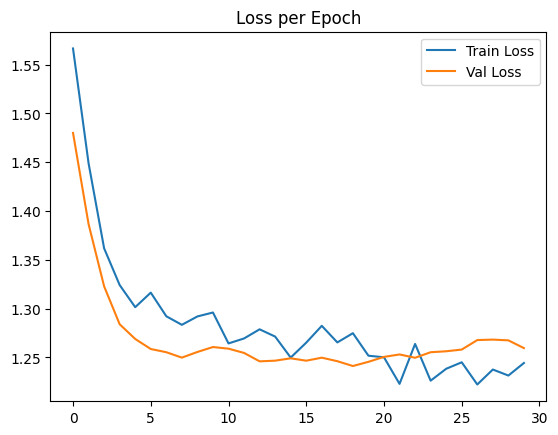

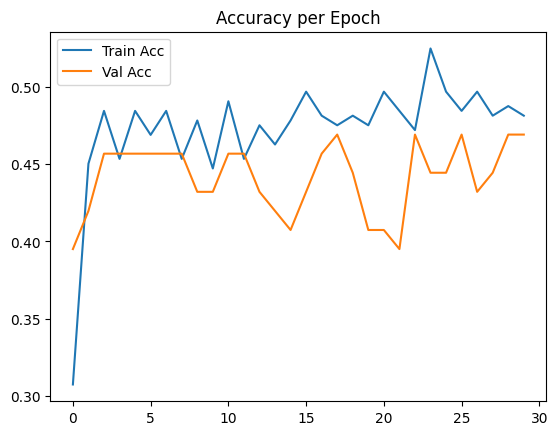

In [103]:
# Plot Loss & Accuracy (WAJIB)
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss per Epoch")
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy per Epoch")
plt.show()

In [104]:
# Confusion matrix dan visualisasi untuk model Deep Learning
y_pred_dl = np.argmax(model_dl.predict(X_test_scaled), axis=1)

print("Accuracy (DL):", accuracy_score(y_test - 1, y_pred_dl))
print(classification_report(y_test - 1, y_pred_dl))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy (DL): 0.43564356435643564
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        14
           3       0.35      0.21      0.26        33
           4       0.46      0.80      0.58        46

    accuracy                           0.44       101
   macro avg       0.16      0.20      0.17       101
weighted avg       0.32      0.44      0.35       101



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


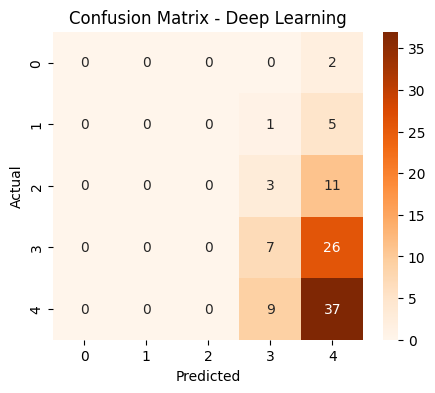

In [105]:
# Confusion matrix dan visualisasi untuk model Deep Learning
cm_dl = confusion_matrix(y_test - 1, y_pred_dl)

plt.figure(figsize=(5,4))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Deep Learning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

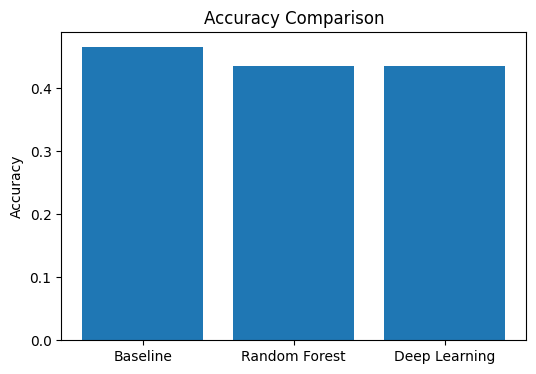

In [106]:
models = ['Baseline', 'Random Forest', 'Deep Learning']

baseline_result = {'Accuracy': accuracy_score(y_test, y_pred_baseline)}
rf_result = {'Accuracy': accuracy_score(y_test, y_pred_rf)}
dl_result = {'Accuracy': accuracy_score(y_test - 1, y_pred_dl)}

accuracy = [baseline_result['Accuracy'], rf_result['Accuracy'], dl_result['Accuracy']]

plt.figure(figsize=(6,4))
plt.bar(models, accuracy)
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [107]:
import joblib
import os

os.makedirs("models", exist_ok=True)

# Simpan Logistic Regression
joblib.dump(model_baseline, "models/logistic_regression.joblib")

# Simpan Random Forest
joblib.dump(model_rf, "models/random_forest.joblib")

# Simpan model Deep Learning
model_dl.save("models/deep_learning_mlp.h5")
